In [1]:
import json
def _read(input_file):
    with open(input_file, "r", encoding="utf-8") as f:
        data = json.load(f)
        return data

def _write(output_file, data):
    with open(output_file, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4, ensure_ascii=False)

In [6]:
cont = _read("/root/test_research/Domain_CSC/result/02-04/gpt-4o-mini_contrastive_3/wrong_sents.json")
noni = _read("/root/test_research/Domain_CSC/result/02-04/gpt-4o-mini_non_instruction_3/wrong_sents.json")
inst = _read("/root/test_research/Domain_CSC/result/02-04/gpt-4o-mini_instruction_3/wrong_sents.json")

In [59]:
noni_i = set(item['i'] for item in noni)
cont_i = set(item['i'] for item in cont)
inst_i = set(item['i'] for item in inst)

# all_four은 네 세트의 교집합
all_three = noni_i & cont_i & inst_i

# 각 세트에서 all_four를 빼기
noni_i = noni_i - all_three
cont_i = cont_i - all_three
inst_i = inst_i - all_three


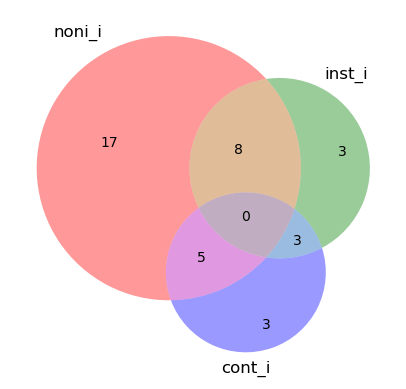

In [60]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# 벤 다이어그램 그리기
venn = venn3([noni_i, inst_i, cont_i], set_labels=('noni_i', 'inst_i', 'cont_i'))

# 그래프 표시
plt.show()


In [2]:
inst_pred = _read("/root/test_research/Domain_CSC/result/02-04/gpt-4o-mini_instruction_3/gpt-4o-mini_instruction_result.json")
noni_pred = _read("/root/test_research/Domain_CSC/result/02-04/gpt-4o-mini_non_instruction_3/gpt-4o-mini_non_instruction_result.json")
cont_pred = _read("/root/test_research/Domain_CSC/result/02-04/gpt-4o-mini_contrastive_3/gpt-4o-mini_contrastive_result.json")

In [9]:
for item in inst_pred:
    item.pop('err_types')
    item['err_types'] = []
for item in inst:
    for line in inst_pred:
        if item['i'] == line['instance_index']:
            line['err_types'] = item['err_type']
            break
    else:
        raise ValueError(f"cont: {item['i']} not found")

In [11]:
print(cont_pred[0])

{'domain': '时尚', 'instruction_big_type': '', 'instruction_small_type': '', 'instruction': '新兴的时尚风格相关的新词语不需要修改。', 'instruction_index': 0, 'keyword': ['lo娘', 'lo娘'], 'keyword_label': 1, 'input': '上流社会lo娘的一周穿搭', 'output': '上流社会lo娘的一周穿搭', 'typos': [], 'false_keyword': ['lo娘', 'Lolita'], 'false_output': None, 'data_source': 'xiaohongshu', 'seq_label': 1, 'instance_index': 0, 'predict': '上流社会lo娘的一周穿搭', 'err_types': []}


In [10]:
from evaluate_result import clean_text
import ipdb
for item in inst_pred:
    if len(item['err_types']) > 0:
        item['key_label'] = 0
    else:
        item['key_label'] = 1
    if clean_text(item['output']) != clean_text(item['predict']):
        item['sent_label'] = 0
    else:
        item['sent_label'] = 1
_write("./temp.json", cont_pred)

In [15]:
cnt = 0
for item in inst_pred:
    if item['key_label'] == 1 & item['sent_label'] == 0:
        cnt+=1
print(cnt)

76


In [16]:
cnt=0

for item in cont_pred:
    if item['key_label'] == 1 & item['sent_label'] == 0:
        cnt+=1
print(cnt)

73


In [66]:
result = []
total_i = noni_i | cont_i | inst_i
for idx in list(total_i):
    # Get the items for this index
    inst_item = [item for item in inst_pred if item['instance_index'] == idx]
    noni_item = [item for item in noni_pred if item['instance_index'] == idx]
    cont_item = [item for item in cont_pred if item['instance_index'] == idx]

    # Skip if any of the lists are empty
    if not inst_item or not noni_item or not cont_item:
        raise ValueError("Empty list",inst_item, noni_item, cont_item)

    # # Check if any typo in inst_item is missing from the prediction
    # if all(typo in inst_item[0]['predict'] for typo in inst_item[0]['typos']):
    #     continue

    # # Check if none of the typos in inst_item are in noni_item prediction
    # if not any(typo in noni_item[0]['predict'] for typo in inst_item[0]['typos']):
    #     continue

    # Collect error modes
    error_mode = []
    if idx in noni_i:
        error_mode.append('noni')
    if idx in cont_i:
        error_mode.append('cont')
    if idx in inst_i:
        error_mode.append('inst')

    # Create the item and append it to the result
    item = {
        "src": inst_item[0]['input'],
        "tgt": inst_item[0]['output'],
        "keyword": inst_item[0]['keyword'],
        "typo": inst_item[0]['typos'],
        "inst": inst_item[0]['predict'],
        "noni": noni_item[0]['predict'],
        "cont": cont_item[0]['predict'],
        "error_mode": error_mode,
        "i": idx
    }
    result.append(item)

In [67]:
_write("./temp.json", result)

In [18]:
nonii = [item['i'] for item in noni]
insti = [item['i'] for item in inst]
conti = [item['i'] for item in cont]
nonierr = [(item['i'],item['err_type']) for item in noni]
insterr = [(item['i'],item['err_type']) for item in inst]
conterr = [(item['i'],item['err_type']) for item in cont]

In [19]:
nonii_set = set(nonii)
insti_set = set(insti)
conti_set = set(conti)

import matplotlib.pyplot as plt

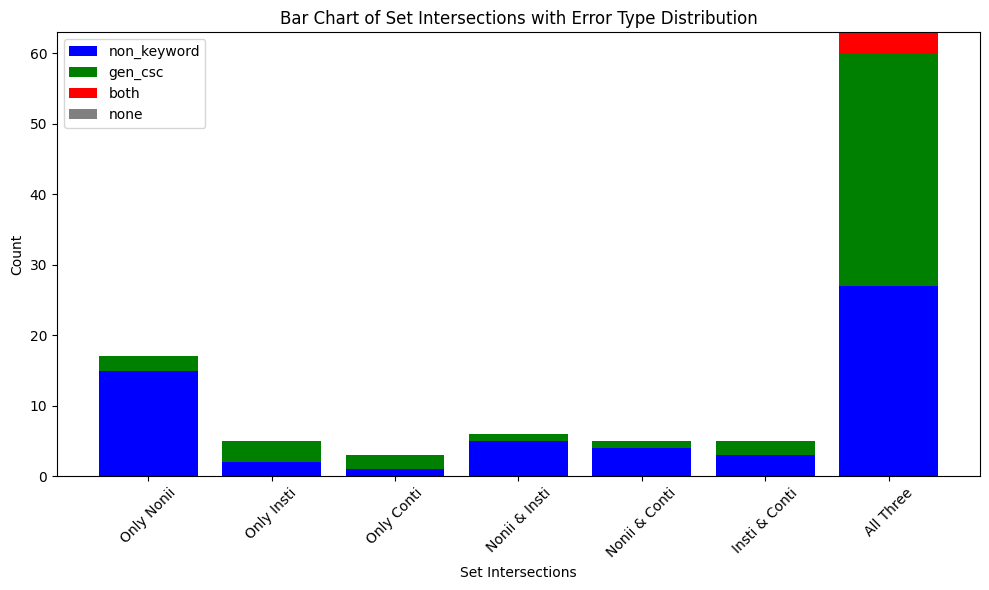

In [20]:
# Counts of individual sets and intersections
only_nonii = len(nonii_set - insti_set - conti_set)
only_insti = len(insti_set - nonii_set - conti_set)
only_conti = len(conti_set - nonii_set - insti_set)
nonii_in_insti = len(nonii_set & insti_set - conti_set)
nonii_in_conti = len(nonii_set & conti_set - insti_set)
insti_in_conti = len(insti_set & conti_set - nonii_set)
all_three = len(nonii_set & insti_set & conti_set)

# Data for the bar chart
data = {
    'Only Nonii': only_nonii,
    'Only Insti': only_insti,
    'Only Conti': only_conti,
    'Nonii & Insti': nonii_in_insti,
    'Nonii & Conti': nonii_in_conti,
    'Insti & Conti': insti_in_conti,
    'All Three': all_three
}

# Error types for each intersection
err_data = {
    'Only Nonii': [item[1] for item in nonierr if item[0] in nonii_set - insti_set - conti_set],
    'Only Insti': [item[1] for item in insterr if item[0] in insti_set - nonii_set - conti_set],
    'Only Conti': [item[1] for item in conterr if item[0] in conti_set - nonii_set - insti_set],
    'Nonii & Insti': [item[1] for item in nonierr if item[0] in nonii_set & insti_set - conti_set],
    'Nonii & Conti': [item[1] for item in nonierr if item[0] in nonii_set & conti_set - insti_set],
    'Insti & Conti': [item[1] for item in insterr if item[0] in insti_set & conti_set - nonii_set],
    'All Three': [item[1] for item in nonierr if item[0] in nonii_set & insti_set & conti_set],
}


# Plotting Bar Chart with colored segments
plt.figure(figsize=(10, 6))

for i, (label, count) in enumerate(data.items()):
    # Get error types and counts
    err_type_list = err_data[label]
    
    # Count occurrences of each error type
    non_keyword_count = sum(1 for err in err_type_list if 'non_keyword' in err and 'general_csc_err' not in err)
    gen_csc_count = sum(1 for err in err_type_list if 'general_csc_err' in err and 'non_keyword' not in err)
    both_count = sum(1 for err in err_type_list if 'non_keyword' in err and 'general_csc_err' in err)
    none_count = sum(1 for err in err_type_list if 'non_keyword' not in err and 'general_csc_err' not in err)

    # Calculate proportions for each error type
    total_count = data[label]
    if non_keyword_count + gen_csc_count + none_count + both_count != total_count:
        assert ValueError(non_keyword_count, gen_csc_count, none_count, both_count, total_count)

    non_keyword_prop = non_keyword_count / total_count if total_count else 0
    gen_csc_prop = gen_csc_count / total_count if total_count else 0
    both_prop = both_count / total_count if total_count else 0
    none_prop = none_count / total_count if total_count else 0

    # Bar segments (stacked bar effect)
    bar_bottom = 0
    bar_height = total_count

    # Create a stacked bar for this label, each part corresponding to a color for each error type
    plt.bar(label, non_keyword_prop * bar_height, bottom=bar_bottom, color='blue', label='non_keyword' if i == 0 else "")
    bar_bottom += non_keyword_prop * bar_height
    plt.bar(label, gen_csc_prop * bar_height, bottom=bar_bottom, color='green', label='gen_csc' if i == 0 else "")
    bar_bottom += gen_csc_prop * bar_height
    plt.bar(label, both_prop * bar_height, bottom=bar_bottom, color='red', label='both' if i == 0 else "")
    bar_bottom += both_prop * bar_height
    plt.bar(label, none_prop * bar_height, bottom=bar_bottom, color='gray', label='none' if i == 0 else "")
    bar_bottom += none_prop * bar_height

# Adding legend and formatting
plt.title('Bar Chart of Set Intersections with Error Type Distribution')
plt.xlabel('Set Intersections')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Add the legend
plt.legend()

plt.show()


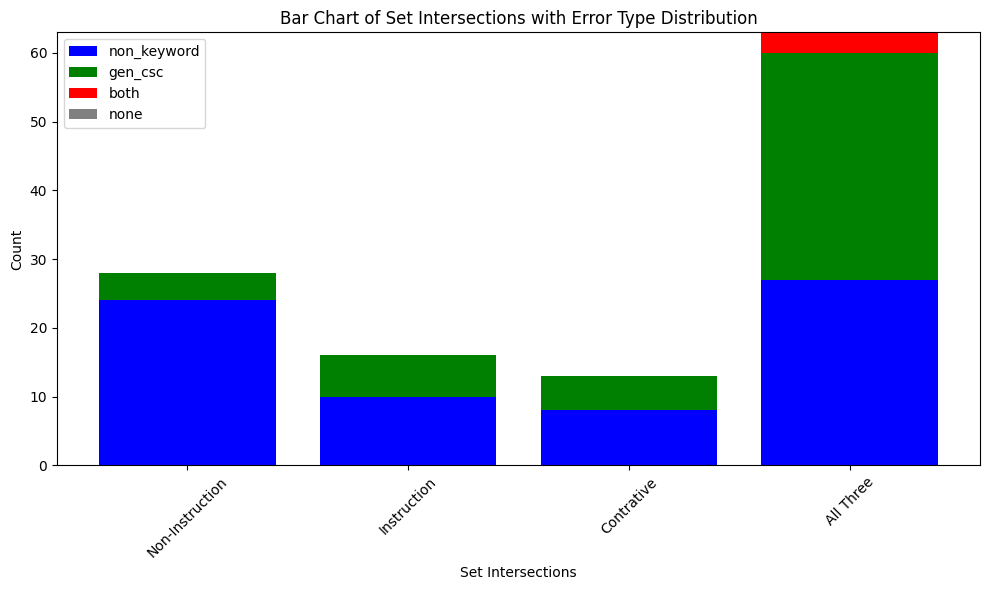

In [21]:
# Counts of individual sets and intersections
all_three = nonii_set & insti_set & conti_set

only_nonii = len(nonii_set - all_three)
only_insti = len(insti_set - all_three)
only_conti = len(conti_set - all_three)

# Data for the bar chart
data = {
    'Non-Instruction': only_nonii,
    'Instruction': only_insti,
    'Contrative': only_conti,
    'All Three': len(all_three)
}

# Error types for each intersection
err_data = {
    'Non-Instruction': [item[1] for item in nonierr if item[0] in nonii_set - all_three],
    'Instruction': [item[1] for item in insterr if item[0] in insti_set - all_three],
    'Contrative': [item[1] for item in conterr if item[0] in conti_set - all_three],
    'All Three': [item[1] for item in nonierr if item[0] in all_three]
}


# Plotting Bar Chart with colored segments
plt.figure(figsize=(10, 6))

for i, (label, count) in enumerate(data.items()):
    # Get error types and counts
    err_type_list = err_data[label]
    
    # Count occurrences of each error type
    non_keyword_count = sum(1 for err in err_type_list if 'non_keyword' in err and 'general_csc_err' not in err)
    gen_csc_count = sum(1 for err in err_type_list if 'general_csc_err' in err and 'non_keyword' not in err)
    both_count = sum(1 for err in err_type_list if 'non_keyword' in err and 'general_csc_err' in err)
    none_count = sum(1 for err in err_type_list if 'non_keyword' not in err and 'general_csc_err' not in err)

    # Calculate proportions for each error type
    total_count = data[label]
    if non_keyword_count + gen_csc_count + none_count + both_count != total_count:
        assert ValueError(non_keyword_count, gen_csc_count, none_count, both_count, total_count)

    non_keyword_prop = non_keyword_count / total_count if total_count else 0
    gen_csc_prop = gen_csc_count / total_count if total_count else 0
    both_prop = both_count / total_count if total_count else 0
    none_prop = none_count / total_count if total_count else 0

    # Bar segments (stacked bar effect)
    bar_bottom = 0
    bar_height = total_count

    # Create a stacked bar for this label, each part corresponding to a color for each error type
    plt.bar(label, non_keyword_prop * bar_height, bottom=bar_bottom, color='blue', label='non_keyword' if i == 0 else "")
    bar_bottom += non_keyword_prop * bar_height
    plt.bar(label, gen_csc_prop * bar_height, bottom=bar_bottom, color='green', label='gen_csc' if i == 0 else "")
    bar_bottom += gen_csc_prop * bar_height
    plt.bar(label, both_prop * bar_height, bottom=bar_bottom, color='red', label='both' if i == 0 else "")
    bar_bottom += both_prop * bar_height
    plt.bar(label, none_prop * bar_height, bottom=bar_bottom, color='gray', label='none' if i == 0 else "")
    bar_bottom += none_prop * bar_height

# Adding legend and formatting
plt.title('Bar Chart of Set Intersections with Error Type Distribution')
plt.xlabel('Set Intersections')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Add the legend
plt.legend()

plt.show()


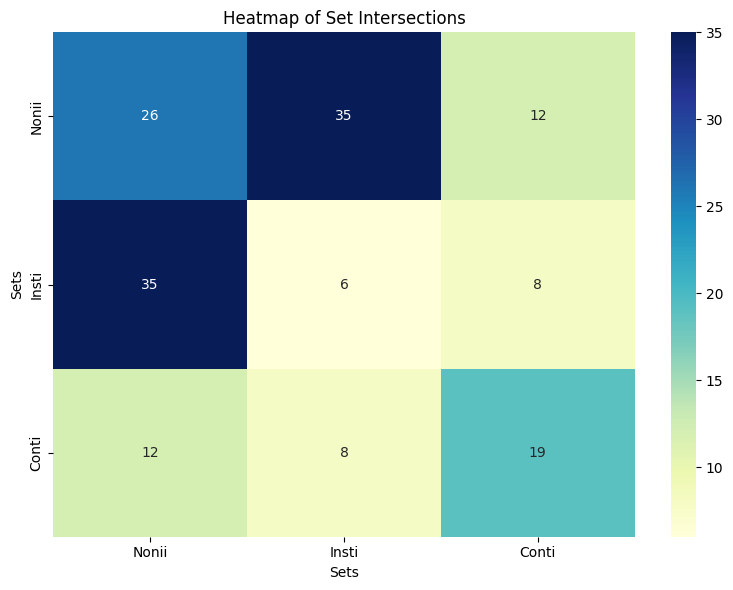

In [26]:
import numpy as np
import seaborn as sns
nonii_set = set(nonii)
insti_set = set(insti)
conti_set = set(conti)

# Counts of individual sets and intersections
only_nonii = len(nonii_set - insti_set - conti_set)
only_insti = len(insti_set - nonii_set - conti_set)
only_conti = len(conti_set - nonii_set - insti_set)
nonii_in_insti = len(nonii_set & insti_set - conti_set)
nonii_in_conti = len(nonii_set & conti_set - insti_set)
insti_in_conti = len(insti_set & conti_set - nonii_set)
all_three = len(nonii_set & insti_set & conti_set)

# Data for the bar chart
data = {
    'Only Nonii': only_nonii,
    'Only Insti': only_insti,
    'Only Conti': only_conti,
    'Nonii & Insti': nonii_in_insti,
    'Nonii & Conti': nonii_in_conti,
    'Insti & Conti': insti_in_conti,
    'All Three': all_three
}

data_matrix = np.array([
    [only_nonii, nonii_in_insti, nonii_in_conti],
    [nonii_in_insti, only_insti, insti_in_conti],
    [nonii_in_conti, insti_in_conti, only_conti]
])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data_matrix, annot=True, cmap="YlGnBu", fmt="d", xticklabels=["Nonii", "Insti", "Conti"], yticklabels=["Nonii", "Insti", "Conti"])
plt.title("Heatmap of Set Intersections")
plt.xlabel("Sets")
plt.ylabel("Sets")
plt.tight_layout()

plt.show()

In [10]:

print("\tkey pos\t:\tkey neg,\tsent pos\t:\t sent neg")
print("Whole:\t", key_cnt,"\t:\t", len(data)-key_cnt,",\t\t", sent_cnt,"\t\t:\t", len(data)-sent_cnt)
print("Wrong:\t",wrong_key_cnt,"\t:\t", len(wrong_sents)-wrong_key_cnt,",\t\t", wrong_sent_cnt,"\t\t:\t", len(wrong_sents)-wrong_sent_cnt)   

	key pos	:	key neg,	sent pos	:	 sent neg
Whole:	 95 	:	 307 ,		 145 		:	 257
Wrong:	 43 	:	 78 ,		 71 		:	 50


	 Key lev	Sent lev
Pos:	 0.4 		 0.4
Neg:	 0.5 		 0.2
